In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nt = 10_000

In [36]:
#1) cars follow poisson at noon
mn = 2
dist_cars = stats.poisson(2)


<BarContainer object of 12 artists>

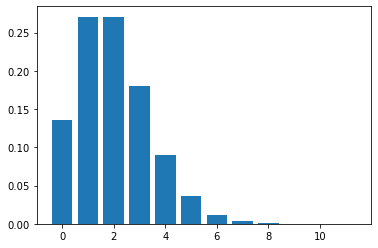

In [84]:
x = np.arange(0,12)
y= dist_cars.pmf(x)

plt.bar(x,y)


In [39]:
#for experimental, use dist.rvs(size) to generate df of random values
exp_cars = dist_cars.rvs(nt)

In [40]:
#1a) prob no cars at noon?
min(exp_cars) #validate zero
#pull out array when equal to zero, get length - make as percent
expCh = 100*len(exp_cars[exp_cars == 0])/nt

print(f'The chance of no cars at noon is:')
print(f'{round(expCh,1)}% (exp)\n{round(dist_cars.pmf(0)*100,1)}% (theor)')

The chance of no cars at noon is:
13.2% (exp)
13.5% (theor)


In [31]:
#1b) prob of 3+ cars?
expCh = 100*len(exp_cars[exp_cars >=3])/nt
print(f'The chance of having 3 or more cars at noon is:')
print(f'{round(expCh,1)}% (exp)')
print(f'{round(dist_cars.sf(2)*100,1)}% (theor)')

The chance of having 3 or more cars at noon is:
32.0% (exp)
32.3% (theor)


In [33]:
#1c) prob of getting 1+ car?
expCh = 100*len(exp_cars[exp_cars >=1])/nt
print(f'The chance of having at least 1 car at noon is:')
print(f'{round(expCh,1)}% (exp)')
print(f'{round(dist_cars.sf(0)*100,1)}% (theor)')

The chance of having at least 1 car at noon is:
86.8% (exp)
86.5% (theor)


In [35]:
#2) normal dist of grades
mn = 3
stdv = .3
grades = stats.norm(mn,stdv)

exp_grades = pd.DataFrame(grades.rvs(nt)) #this is getting a hypothetic 10,000 student grades
#could also do 10,000 hypothetical classes of a given size.  but we don't know class size, so will just use distro


In [45]:
#2a) gpa to be in top 5%  
#FINISH THE EXPERIMENTAL
# exp_grades.sort_values
grades.isf(.05)

3.4934560880854417

In [43]:
#2b) GPA that is bottom 15%
grades.ppf(.15)

2.689069983151863

In [52]:
#2c) third decile from the bottom - so 20-30%
minG = grades.ppf(.2)
maxG = grades.ppf(.3)
gpa = 2.8
if minG < gpa < maxG:
    words = "would"
else: words = "would not"
        
print(f'The GPA range for this scholarship is between {minG} and {maxG}.')
print(f'A student with a GPA of {gpa} {words} get the scholarship')

The GPA range for this scholarship is between 2.7475136299281258 and 2.842679846187588.
A student with a GPA of 2.8 would get the scholarship


In [53]:
#2d) 3.5 percentile?
1-grades.cdf(3.5) #top percentile - aka top 5%

0.047790352272814696

In [ ]:
#3)
#as a binomial
stats.binom(4326,.02).sf(96)

In [54]:
#3 as a poisson - THIS CELL IS WRONG
mn=.02
val = 97/4326
dist = stats.poisson(mn)

1-dist.cdf(val)

#rethink as poisson - THIS CELL IS WRONG 
# dist = stats.poisson(mn*10_000)
# dist.sf(10_000*96/4326)

0.019801326693244747

In [57]:
#4) 100 questions. answers are probability rounded to the hundreth's place
#random answer chance of being right = .01
stats.binom(60,.01).sf(0)
#of 60 attempts, and a .01 chance of being right the chance we get at least 1 right is

0.45284335760923855

In [58]:
#5) 
ch=.03
#90% of 3 cohorts of 22 students
nvisits = .9*3*22

#chance any one student cleans up? 
stats.binom(nvisits,ch).sf(0)


0.8362274861228873

In [60]:
#chance they don't clean up for two days
#chance a given day is cleaned (same as above)
clean = stats.binom(nvisits,ch).sf(0)

#now, do they not do it twice in a row?
stats.binom(2,clean).pmf(0)

0.026821436301629063

In [65]:
#ALSO RIGHT - concept would apply to less situations (see next)
stats.binom(nvisits*2,ch).pmf(0)

0.026821436301628983

In [66]:
#Different question - chance of being cleaned at least once on both days
#RIGHT 
stats.binom(2,clean).sf(1)

0.6992764085474037

In [62]:
#Different question - chance of being cleaned at least once on both days
#WRONG - actually gives us the chance of 2 cleans over the course of 2 days 
#(doesn't make sure the cleans are on different days)
stats.binom(nvisits*2,ch).sf(1)
#notice how this percentage is higher than the chance of it 
# getting cleaned on any given day

0.8746305235138288

In [67]:
#5 con't) how likely break area doesn't get cleaned for a week?
stats.binom(5,clean).pmf(0)

0.00011781621791055127

In [68]:
1-stats.binom(5,clean).sf(0)

0.00011781621791051577

In [78]:
#6) Chance of having time to eat lunch?
mn = 15
stdv = 3
t_ppl = 2  #minutes for each other person to order
t_food = 12 #minutes to get food after ordering + time to order
t_eat = 15

#distro of ppl in line
line = stats.norm(mn,stdv)
#BETTER - want distro of line in minutes before I can order
wait = stats.norm(mn*2,stdv*2) #distro of minutes prior to ordering

#success if wait less than 60 minutes minus 15 to 3at and 12 for your order and food
#aka the max wait time that allows me at least 15 minutes to eat
maxWait = 60-t_eat-t_food

#so what is the probability we are under the maxWait?
wait.cdf(maxWait)

0.6914624612740131

In [95]:
# #7) 
# #get data
# # relpath = "..numpy-pandas-visualization-exercises"
# # from relpath import env
# from ..numpy-pandas-visualization-exercises/ import env

# sal = read_sql("SELECT * FROM salaries",get_db_url('employees'))